# ***Creation of Machine Learning models to identify the types of breast cancer, between benign and malignant***

### 1. Setup

#### 1.1 Importing Libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score 
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
import pydotplus
from IPython.display import Image

#### 1.2 Loading the Database

In [4]:
# Data Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

rout_path = "data.csv"
df = pd.read_csv(rout_path)

### 2. Database analysis and initial treatments

#### 2.1 Analysis of the Bases

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 2.2 Remove unnecessary attributes

In [7]:
list = ['Unnamed: 32','id']
Y = df.diagnosis                
X = df.drop(list,axis = 1 )
X.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### 3. Pre-Processing

#### 3.1 Select Base and Labels

In [8]:
#Select training base: All columns except "diagnosis"
x = X.drop('diagnosis',axis = 1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [9]:
# Label Encoder.
# Câncer: Malignant (M) / Benign (B) 
le = LabelEncoder()
y = le.fit_transform(X["diagnosis"])
print("Labels:", y)

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 

#### 3.2 Partitioning Data Base (10% traning, 90% test)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.1)

In [11]:
print("\nDimensions: {0}".format(X.shape))
print("\nFields: {0}".format(X.keys()))
print("\n",X.describe(), sep='\n')


Dimensions: (569, 31)

Fields: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000 

### 4. Machine Learning Modeling

#### 4.1 Decision Tree

In [12]:
treeCancerBreast = DecisionTreeClassifier(random_state=0, criterion='gini') # criterion='entropy'

treeCancerBreast = treeCancerBreast.fit(x_train, y_train)

treeCancerBreast.predict(x_train)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [13]:
print("Accuracy(training base):", treeCancerBreast.score(x_train, y_train))

Accuracy(training base): 1.0


In [14]:
y_pred = treeCancerBreast.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [15]:
print("Accuracy(test base):", accuracy_score(y_test, y_pred))

Accuracy(test base): 0.8771929824561403


**Confusion Matrix**

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Malignant", "Benign"], columns=["Malignant (pred)", "Benign (pred)"])
print(cnf_table)

           Malignant (pred)  Benign (pred)
Malignant                29              6
Benign                    1             21


In [17]:
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

              precision    recall  f1-score   support

   Malignant       0.97      0.83      0.89        35
      Benign       0.78      0.95      0.86        22

    accuracy                           0.88        57
   macro avg       0.87      0.89      0.87        57
weighted avg       0.89      0.88      0.88        57



**Show Decision tree**

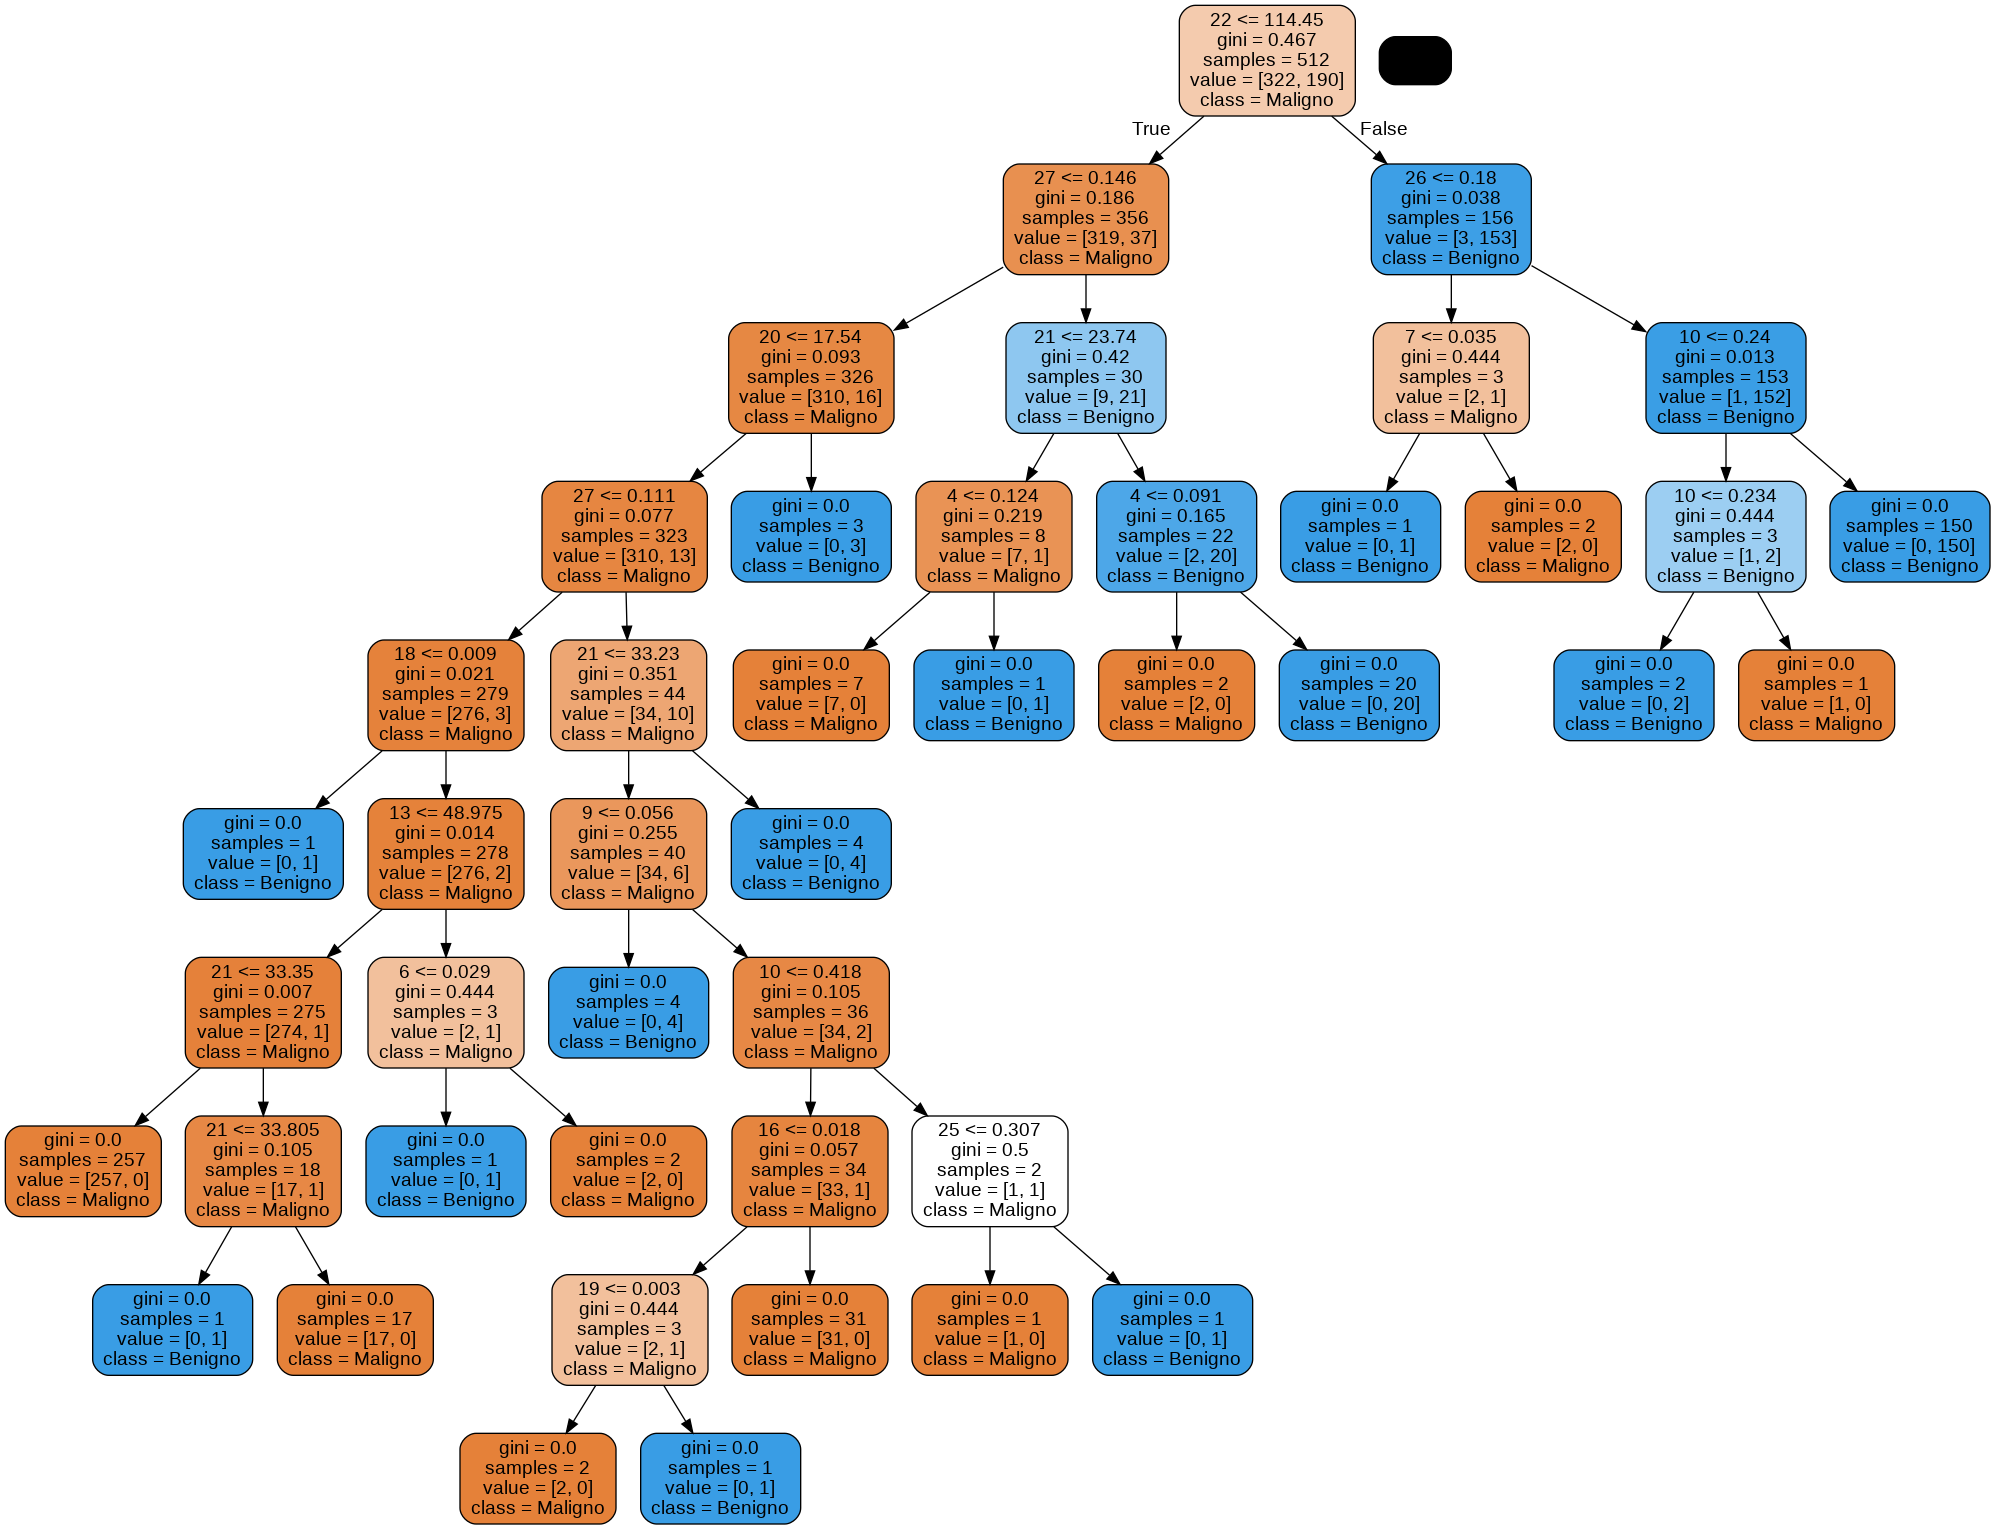

In [18]:
# Create DOT data
dot_data = tree.export_graphviz(treeCancerBreast, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,30),  
                                class_names=["Maligno", "Benigno"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


#### 4.2 KNN (K Nearest Neighbor)

In [19]:
Y = X.diagnosis

list = ['diagnosis']
X = X.drop(list,axis = 1 )
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

**Cases by classes**

Benign:  357
Malignant:  212


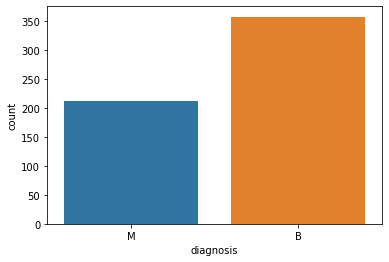

In [20]:
ax = sns.countplot(Y,label="Count")       # M = 212, B = 357
B, M = Y.value_counts()
print('Benign: ',B)
print('Malignant: ',M)

In [21]:
X.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

HOTMAP

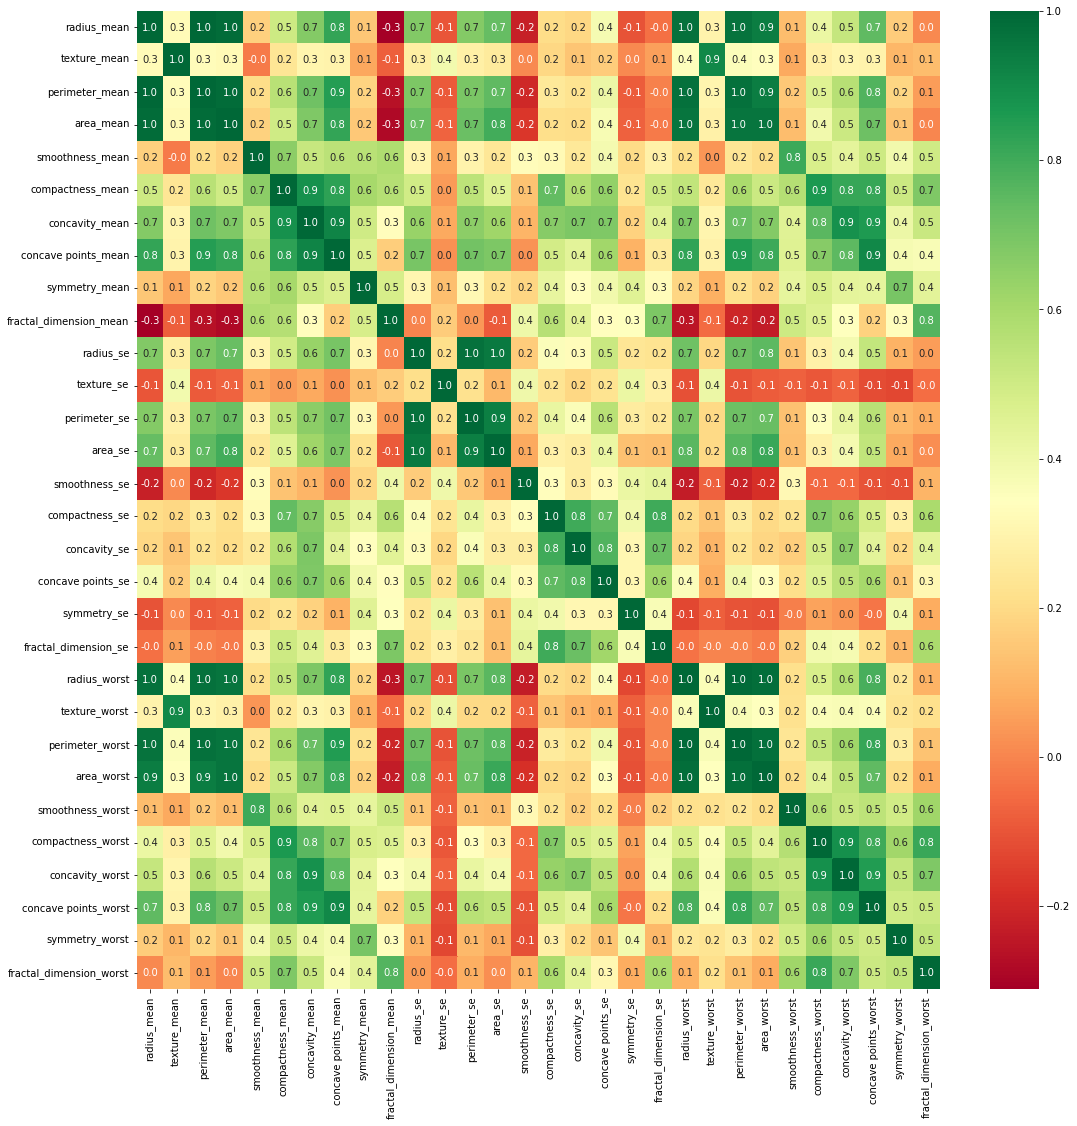

In [22]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

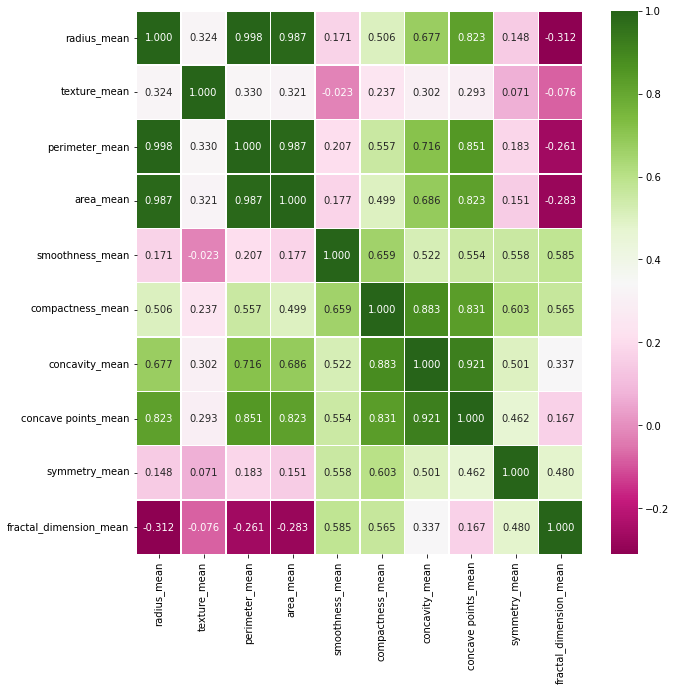

In [23]:
so_mean = [x for x in X.columns.to_list() if x.endswith('mean')]
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X[so_mean].corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='PiYG')

Radius, perimeter and area are highly correlated with each other, which is to be expected since perimeter and area are calculated from radius. However, the perimeter is better correlated with the other variables, for this reason we believe it is better to keep the perimeter.
The concavity and the concavity points are also highly correlated, but the points are better correlated with the other variables.

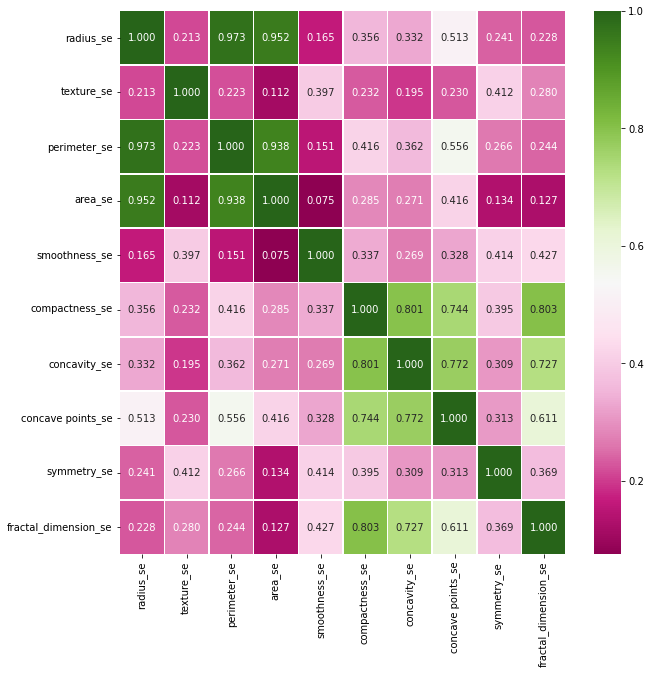

In [24]:
so_se =[x for x in X.columns.to_list() if x.endswith('se')]
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X[so_se].corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='PiYG')

In a similar way to the previous one, the size variables are highly related

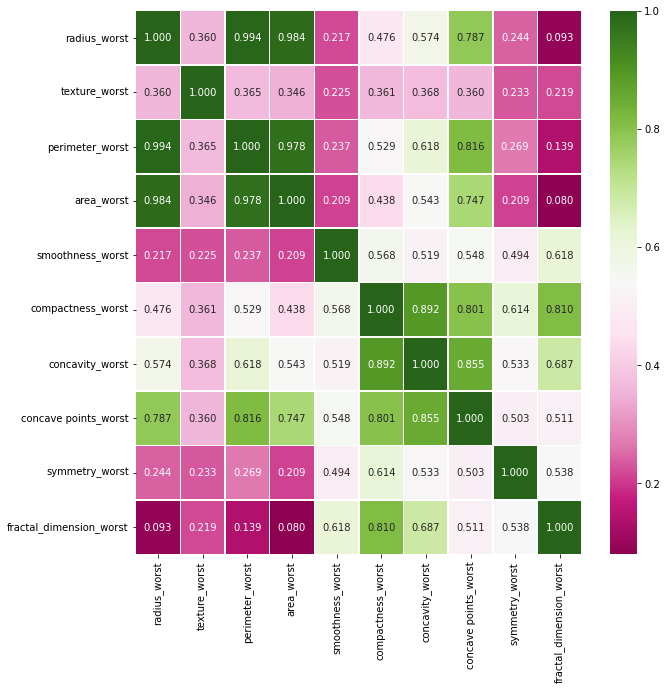

In [25]:
so_worst = [x for x in X.columns.to_list() if x.endswith('worst')]
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X[so_worst].corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='PiYG')


Similar to the previous ones, the size variables are highly related

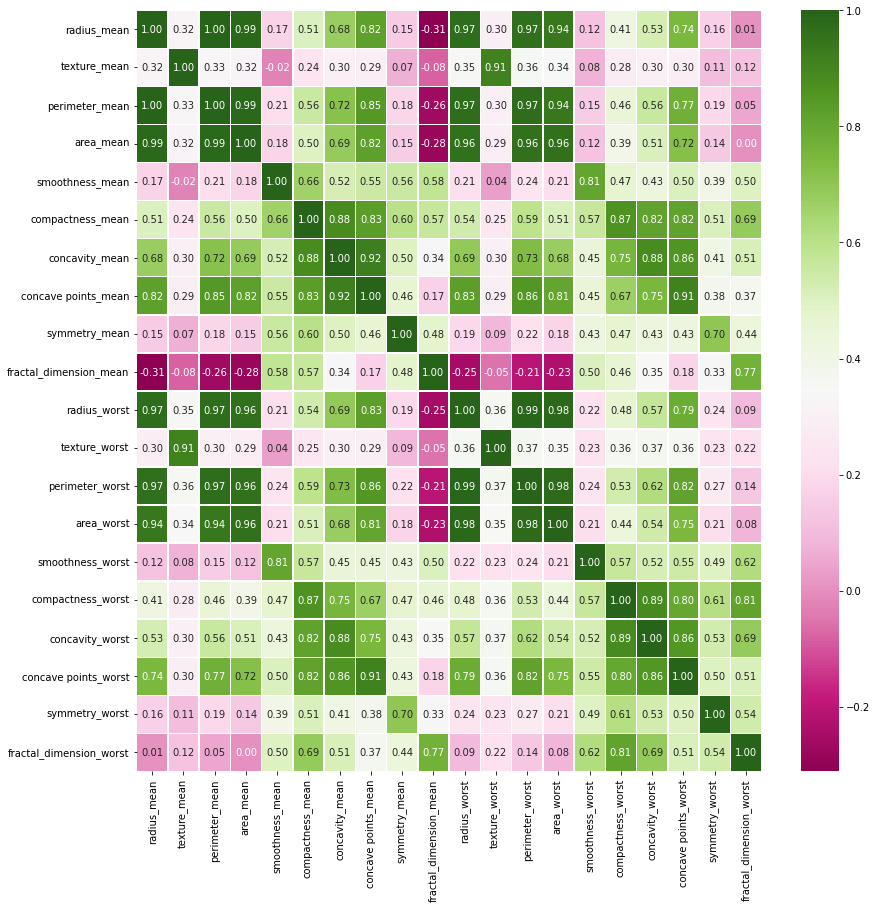

In [26]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.drop(so_se,axis=1).corr(), annot=True, linewidths=.5, fmt= '.2f', cmap ='PiYG')

**Plotting the Violin Chart**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

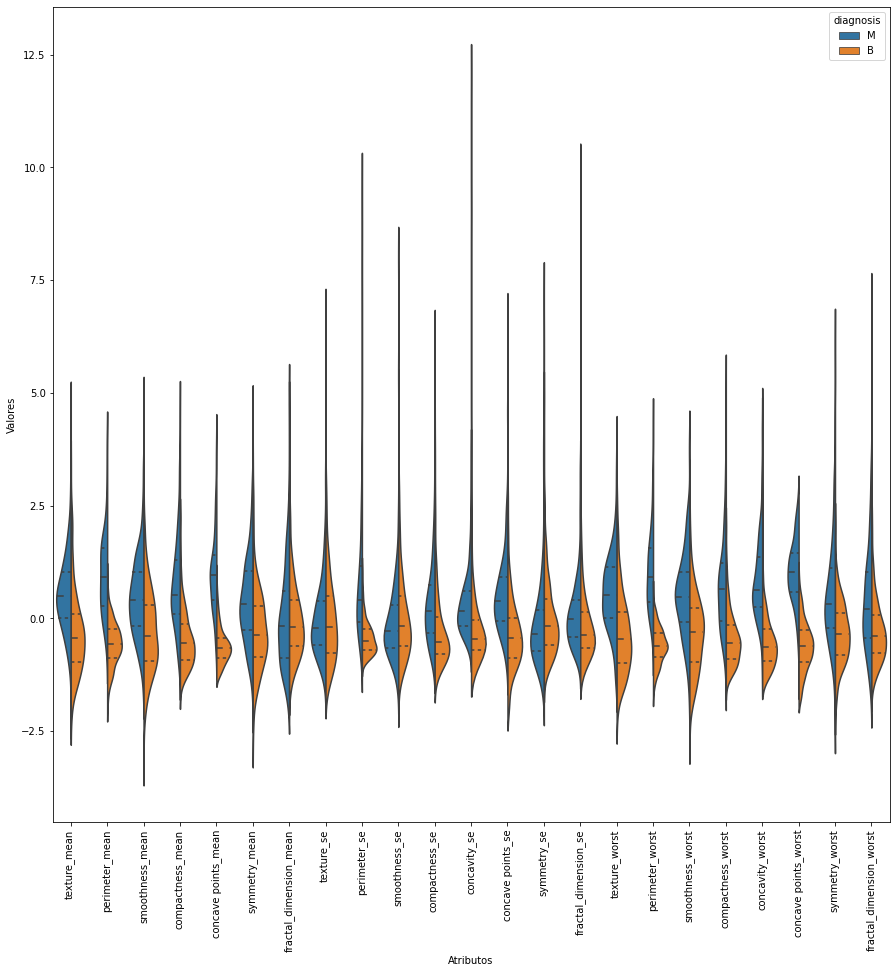

In [27]:
droplist_final = ['radius_mean', 	'area_mean',	'concavity_mean',	'radius_se', 	'area_se',	'radius_worst',	'area_worst']


data_dia = Y
data = X.drop(droplist_final, axis = 1)                      
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([Y,data_n_2],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="Atributos",
                    value_name='Valores')
plt.figure(figsize=(15,15))
sns.violinplot(x="Atributos", y="Valores", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

**Attribute Pair Chart**

In [28]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

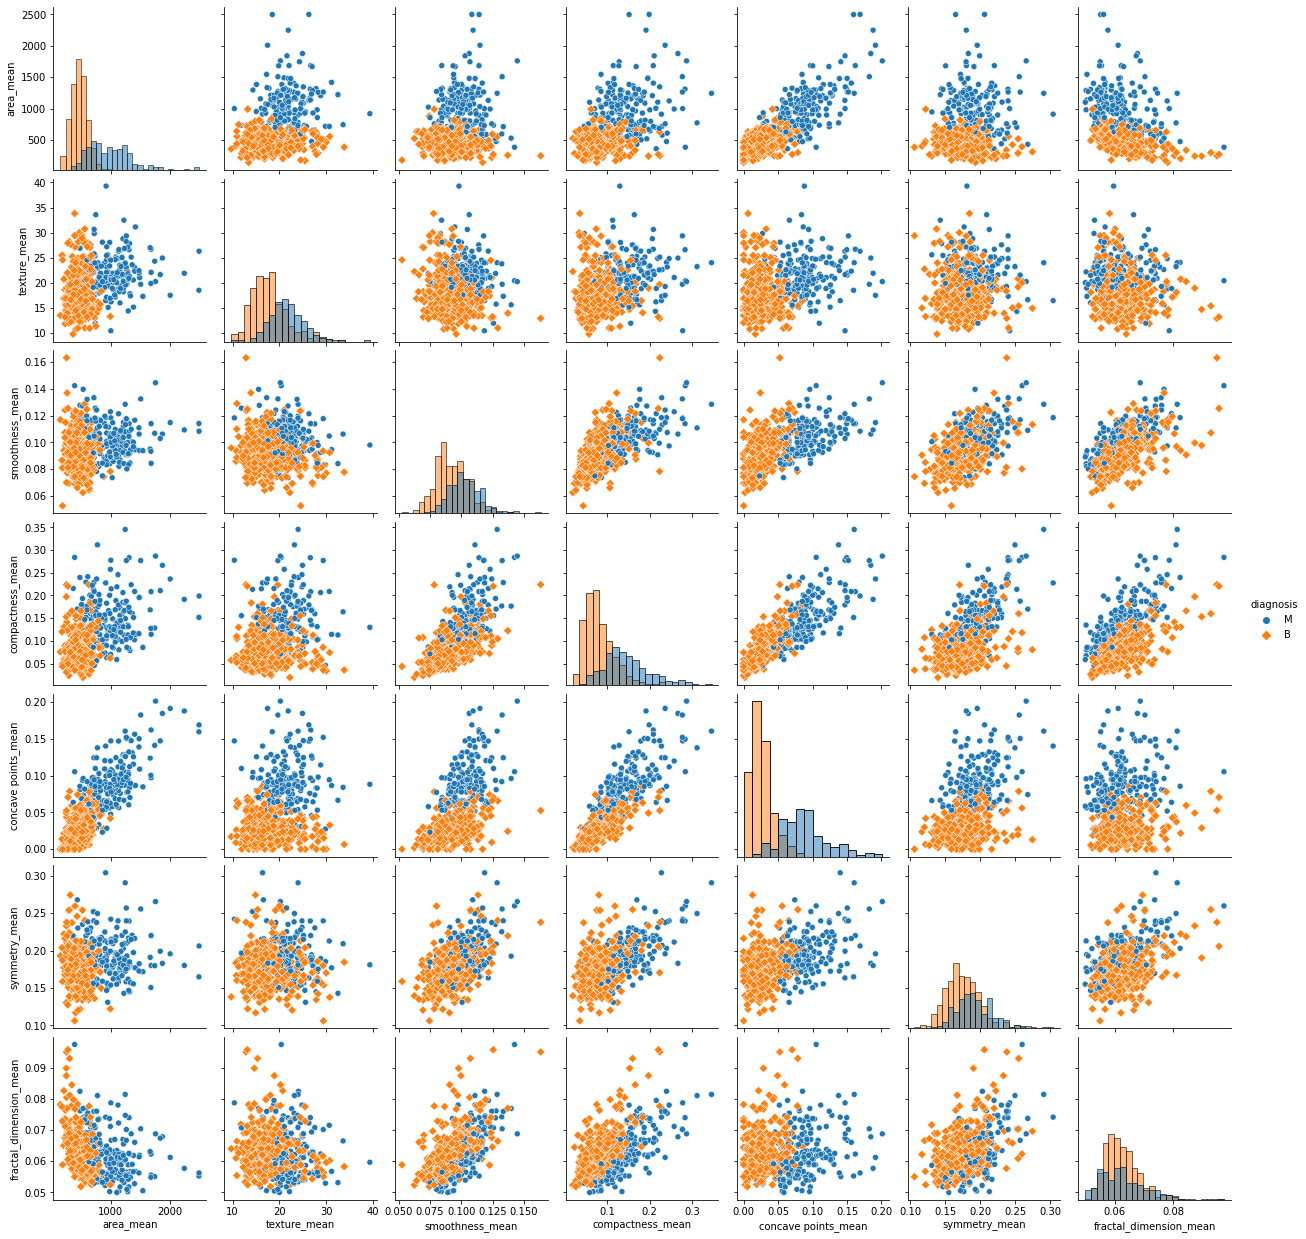

In [29]:
sns.pairplot(df, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"] ) 
plt.show()

Mostrar correlação entre classes e atributos 'se'

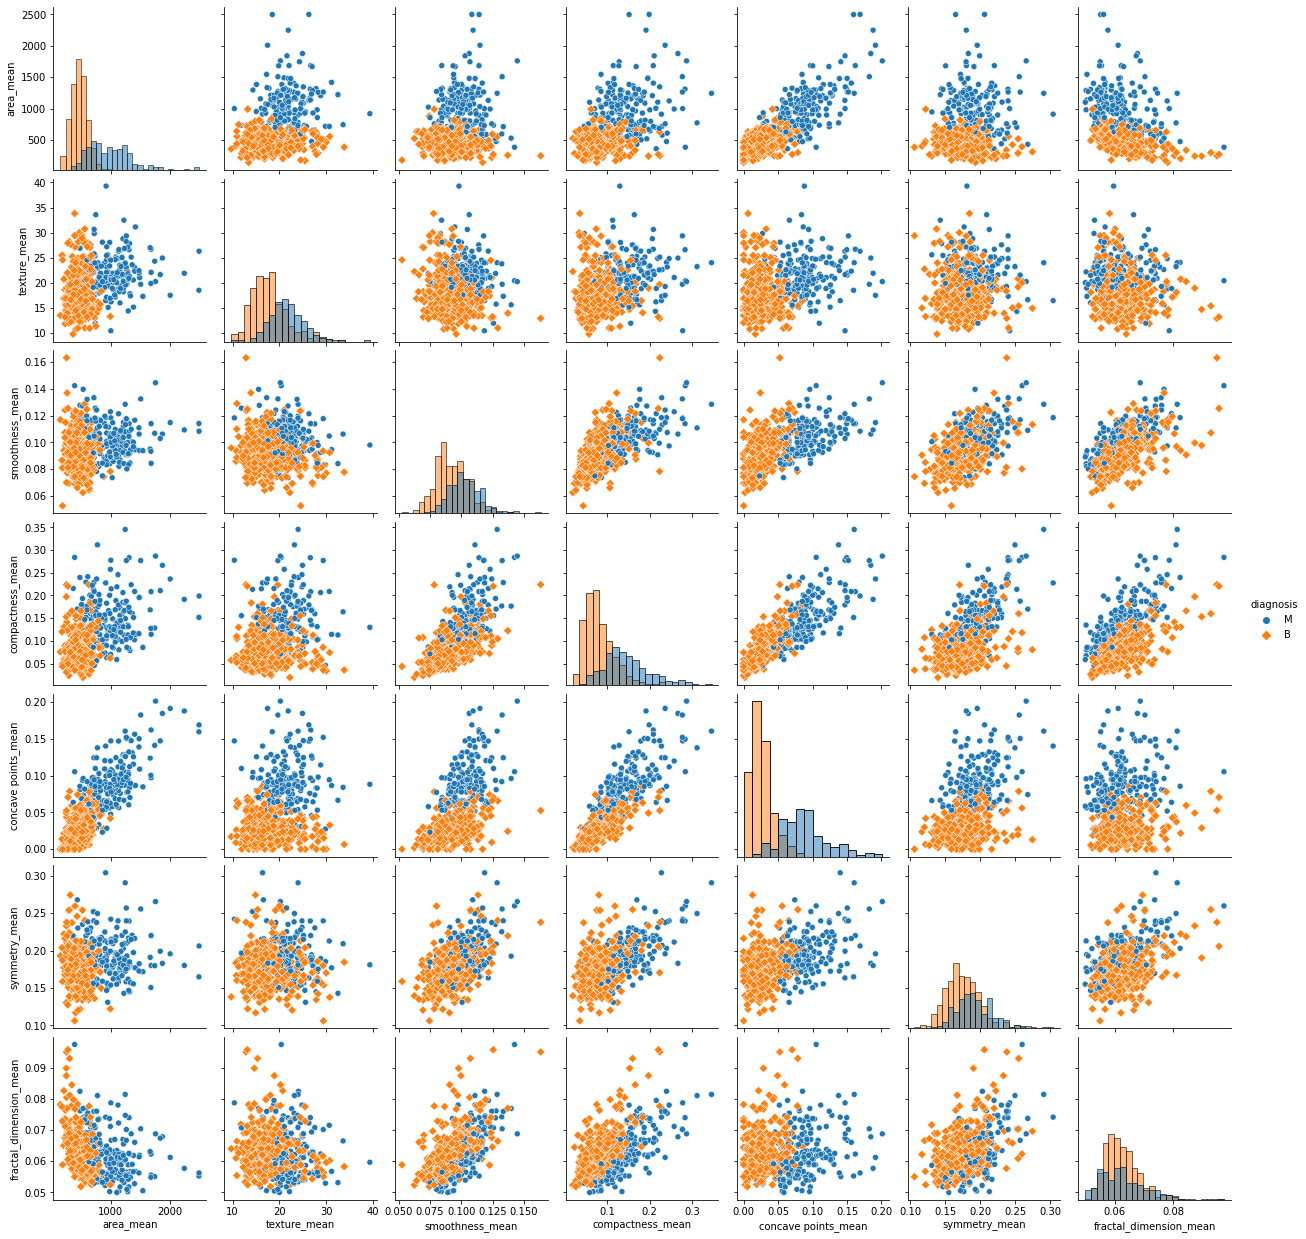

In [33]:
sns.pairplot(df, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"] ) 
plt.show()

In [34]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Mostrar correlação entre classes e atributos 'worst'

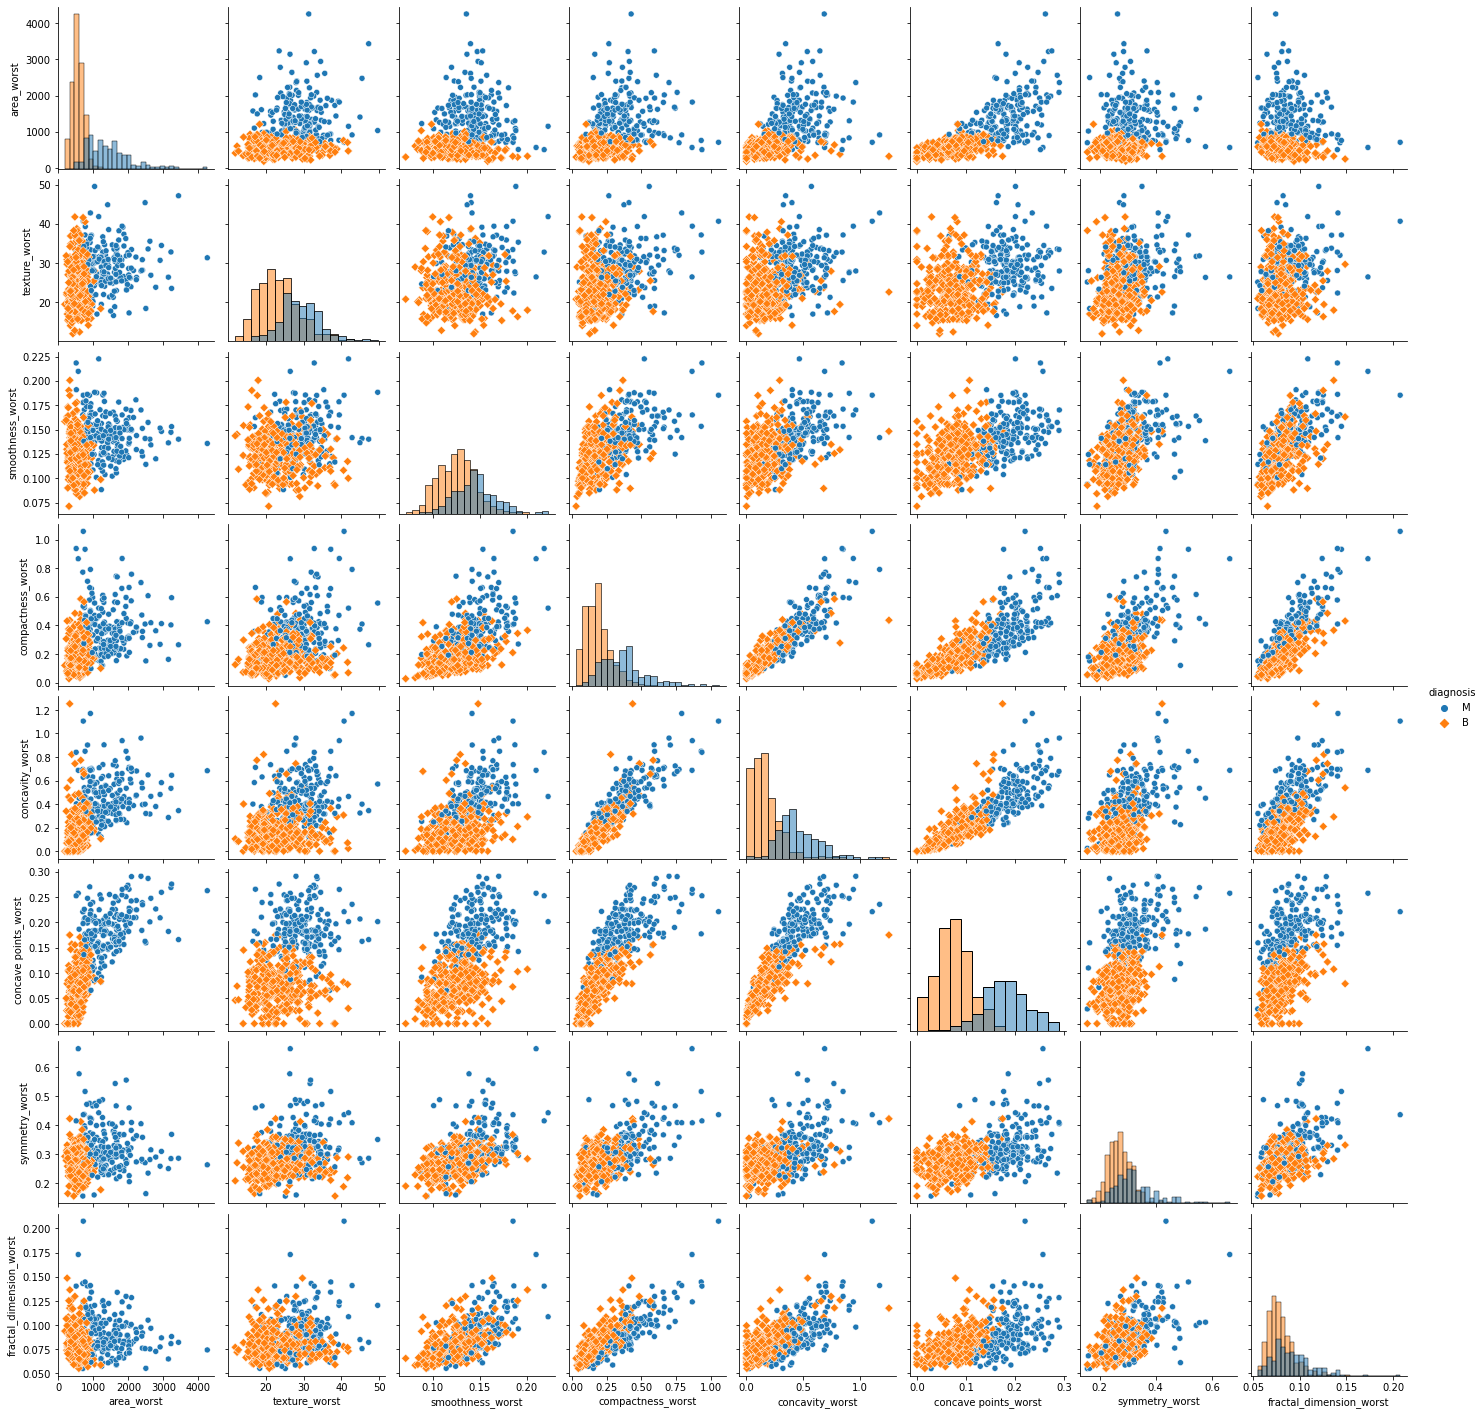

In [35]:
sns.pairplot(df, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_worst", "texture_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst" , "fractal_dimension_worst"] ) 
plt.show()

**Treatments**


Removing attributes that had high correlation

In [36]:
droplist_final = ['radius_mean', 	'perimeter_mean',	'concavity_mean',	'radius_se', 	'perimeter_se',	'radius_worst',	'perimeter_worst']
data = X.drop(droplist_final, axis = 1)


Separating data into Training and Testing

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

print('Traning: ', x_train.shape[0]) 
print('Test: ',x_test.shape[0])

Traning:  426
Test:  143


**Modeling**

Calculate accuracy for K from 1 to 15 using Cross Validation


Test effectiveness with cross validation on the training base

In [38]:
tr_acc = []
k_set = range(1,15)

for n_neighbors in k_set:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  scores = cross_val_score(knn, x_train, y_train, cv=10) 
  tr_acc.append(scores.mean())
  
best_k = np.argmax(tr_acc) 
print('Best k in traning with Cross Validation: ', k_set[best_k]) 

Best k in traning with Cross Validation:  7


**Test**


Calculate accuracy for K from 1 to 15 using Cross Validation

In [39]:
te_acc = []
k_set = range(1,15)

Test effectiveness with cross validation on test base

In [40]:
for n_neighbors in k_set:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test) 
  te_acc.append(sklearn.metrics.accuracy_score(y_test, y_pred)) 

In [41]:
melhor_k = np.argmax(te_acc)
print('Best k in test: ', k_set[melhor_k]) 

Best k in test:  8



Comparison of the accuracy of each K value in training and testing

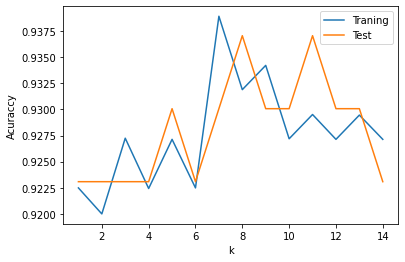

In [42]:
import matplotlib.pyplot as plt

plt.plot(k_set,tr_acc, label='Traning')
plt.plot(k_set,te_acc, label='Test')
plt.ylabel('Acuraccy')
plt.xlabel('k')
plt.legend()

plt.show()

**Score Calculation**


Reapply the model with k=8 , which is the best k obtained from the test base




In [43]:
clf = KNeighborsClassifier(n_neighbors = 8)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
pred_scores = clf.predict_proba(x_test)
print(pred_scores)

[[0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.125 0.875]
 [0.    1.   ]
 [0.375 0.625]
 [1.    0.   ]
 [1.    0.   ]
 [0.375 0.625]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.875 0.125]
 [1.    0.   ]
 [0.    1.   ]
 [0.375 0.625]
 [0.875 0.125]
 [1.    0.   ]
 [0.875 0.125]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.75  0.25 ]
 [1.    0.   ]
 [0.875 0.125]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.875 0.125]
 [1.    0.   ]
 [0.    1.   ]
 [0.125 0.875]
 [0.125 0.875]
 [0.375 0.625]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.25  0.75 ]
 [1.    0.   ]
 [1.    0.   ]
 [0.625 0.375]
 [1.    0.

**Accuracy Calculation**


In [47]:
y_pred = clf.predict(x_test)
te_acc= (sklearn.metrics.accuracy_score(y_test, y_pred)) 
print ('Acuraccy: ', te_acc)

Acuraccy:  0.9370629370629371


**Confusion Matrix**

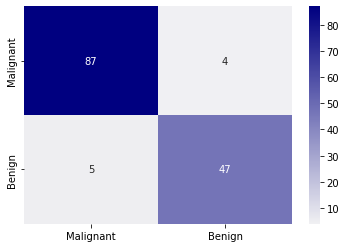

In [49]:
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Malignant', 'Benign']],
                  columns = [i for i in ['Malignant', 'Benign']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_cm, annot=True, cmap=cmap)